In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings .filterwarnings('ignore')

In [2]:
#importing the data

df = pd.read_csv('bank-additional-full (3) (1).csv',sep=';', header=0)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#changing the columns name so we 


df.rename(columns={
    "age": "Age",
    "job": "Job",
    "marital": "Marital Status",
    "education": "Education",
    "default": "Has Default",
    "housing": "Housing Loan",
    "loan": "Personal Loan",
    "contact": "Contact Type",
    "month": "Last Contact Month",
    "day_of_week": "Last Contact Day",
    "duration": "Contact Duration (sec)",
    "campaign": "Campaign Contacts",
    "pdays": "Days Since Prev Contact",
    "previous": "Prev Campaign Contacts",
    "poutcome": "Prev Campaign Outcome",
    "emp.var.rate": "Employment Variation Rate",
    "cons.price.idx": "Consumer Price Index",
    "cons.conf.idx": "Consumer Confidence Index",
    "euribor3m": "Euribor 3-month Rate",
    "nr.employed": "No. of Employees",
    "y": "Subscribed"
}, inplace=True)

In [4]:
df.head()

,Age,Job,Marital Status,Education,Has Default,Housing Loan,Personal Loan,Contact Type,Last Contact Month,Last Contact Day,...,Campaign Contacts,Days Since Prev Contact,Prev Campaign Contacts,Prev Campaign Outcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-month Rate,No. of Employees,Subscribed
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        41195 non-null  float64
 1   Job                        41194 non-null  object 
 2   Marital Status             41194 non-null  object 
 3   Education                  41194 non-null  object 
 4   Has Default                41195 non-null  object 
 5   Housing Loan               41196 non-null  object 
 6   Personal Loan              41195 non-null  object 
 7   Contact Type               41195 non-null  object 
 8   Last Contact Month         41196 non-null  object 
 9   Last Contact Day           41196 non-null  object 
 10  Contact Duration (sec)     41196 non-null  float64
 11  Campaign Contacts          41196 non-null  float64
 12  Days Since Prev Contact    41196 non-null  float64
 13  Prev Campaign Contacts     41196 non-null  flo

In [6]:
df.isnull().sum()

Age                          4
Job                          5
Marital Status               5
Education                    5
Has Default                  4
Housing Loan                 3
Personal Loan                4
Contact Type                 4
Last Contact Month           3
Last Contact Day             3
Contact Duration (sec)       3
Campaign Contacts            3
Days Since Prev Contact      3
Prev Campaign Contacts       3
Prev Campaign Outcome        5
Employment Variation Rate    3
Consumer Price Index         4
Consumer Confidence Index    3
Euribor 3-month Rate         3
No. of Employees             3
Subscribed                   3
dtype: int64

In [7]:
df.duplicated().sum()

15

In [8]:
#describe the data

df.describe()

,Age,Contact Duration (sec),Campaign Contacts,Days Since Prev Contact,Prev Campaign Contacts,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-month Rate,No. of Employees
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
df.describe(include='object')

,Job,Marital Status,Education,Has Default,Housing Loan,Personal Loan,Contact Type,Last Contact Month,Last Contact Day,Prev Campaign Outcome,Subscribed
count,41194,41194,41194,41195,41196,41195,41195,41196,41196,41194,41196
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24934,12168,32595,21584,33957,26151,13769,8623,35563,36556


# data cleaning and feature engineering

In [10]:
# as in this data have very less pervantage of null value so we can drop them 
df.dropna(axis=0,inplace=True)

In [11]:
df.isnull().sum()

Age                          0
Job                          0
Marital Status               0
Education                    0
Has Default                  0
Housing Loan                 0
Personal Loan                0
Contact Type                 0
Last Contact Month           0
Last Contact Day             0
Contact Duration (sec)       0
Campaign Contacts            0
Days Since Prev Contact      0
Prev Campaign Contacts       0
Prev Campaign Outcome        0
Employment Variation Rate    0
Consumer Price Index         0
Consumer Confidence Index    0
Euribor 3-month Rate         0
No. of Employees             0
Subscribed                   0
dtype: int64

In [12]:
df.head()

,Age,Job,Marital Status,Education,Has Default,Housing Loan,Personal Loan,Contact Type,Last Contact Month,Last Contact Day,...,Campaign Contacts,Days Since Prev Contact,Prev Campaign Contacts,Prev Campaign Outcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-month Rate,No. of Employees,Subscribed
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [13]:
#drop the duplicate values

df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

#VISULIZATION

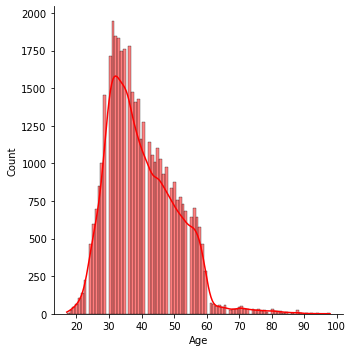

In [15]:
sns.displot(df['Age'],kde=True,color='r')

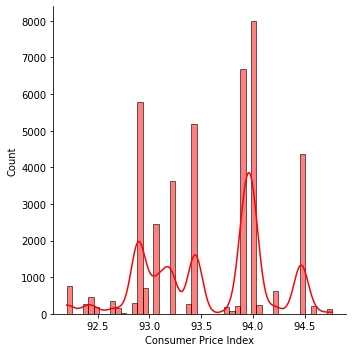

In [16]:

sns.displot(df['Consumer Price Index'],kde=True,color='r')

<Axes: xlabel='Age', ylabel='Subscribed'>

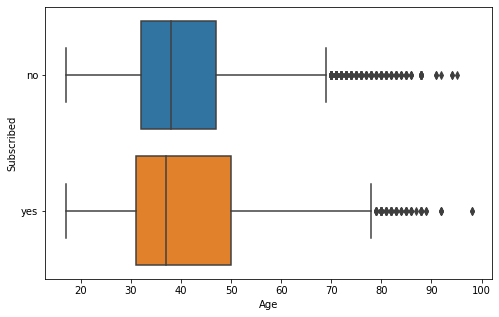

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df['Age'],y = df['Subscribed'])


#in this graph we can see that have some outlier in this

In [18]:
#remove the outlier
Q1 = np.percentile(df['Age'],25)
Q3 = np.percentile(df['Age'],75)
IQR = Q3 - Q1

upper_bond = Q3+1.5*IQR
lower_bond = Q1-1.5*IQR

print(f'Upper_bond = {upper_bond}',f'lower_bond = {lower_bond}')


Upper_bond = 69.5 lower_bond = 9.5


In [19]:
df = df[(df['Age']>=lower_bond) & (df['Age']<=upper_bond)]

<Axes: xlabel='Age', ylabel='Subscribed'>

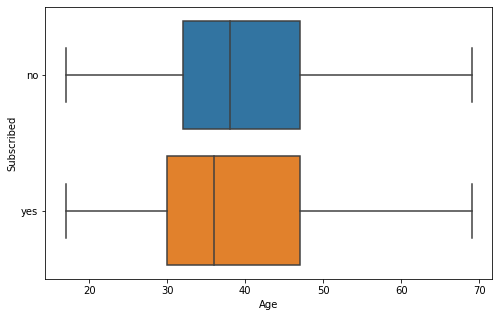

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x = df['Age'],y = df['Subscribed'])

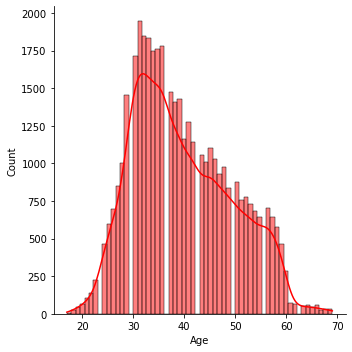

In [21]:
sns.displot(df['Age'],kde=True,color='r')

In [22]:
df.head()

,Age,Job,Marital Status,Education,Has Default,Housing Loan,Personal Loan,Contact Type,Last Contact Month,Last Contact Day,...,Campaign Contacts,Days Since Prev Contact,Prev Campaign Contacts,Prev Campaign Outcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-month Rate,No. of Employees,Subscribed
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: >

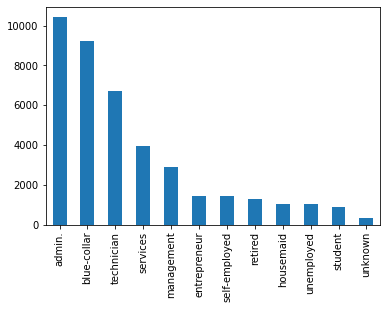

In [23]:
df['Job'].value_counts().plot(kind='bar')

<Axes: >

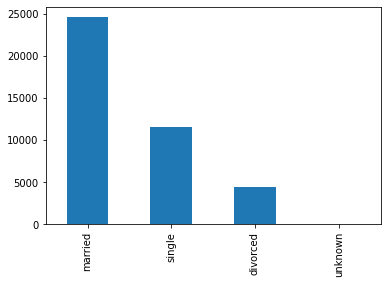

In [24]:
df['Marital Status'].value_counts().plot(kind='bar')

<Axes: >

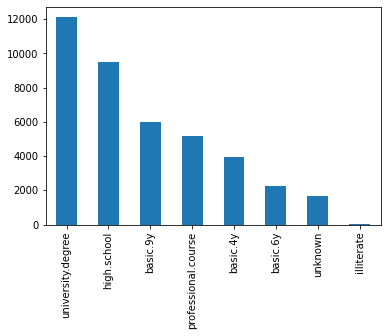

In [25]:
df['Education'].value_counts().plot(kind='bar')

<Axes: >

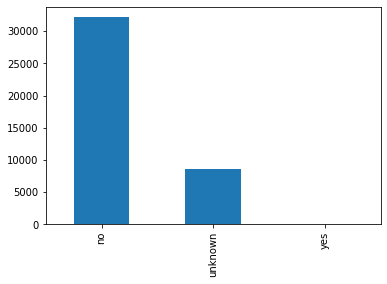

In [26]:
df['Has Default'].value_counts().plot(kind='bar')

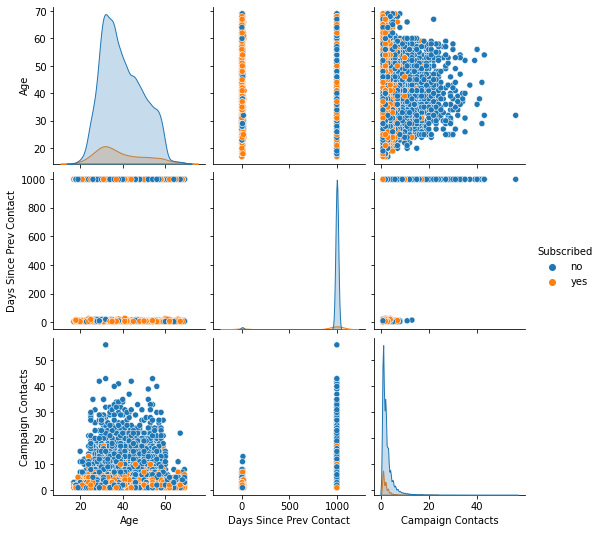

In [27]:
sns.pairplot(df[['Age', 'Days Since Prev Contact', 'Campaign Contacts', 'Subscribed']], hue='Subscribed')
plt.show()

In [28]:
df.columns

Index(['Age', 'Job', 'Marital Status', 'Education', 'Has Default',
       'Housing Loan', 'Personal Loan', 'Contact Type', 'Last Contact Month',
       'Last Contact Day', 'Contact Duration (sec)', 'Campaign Contacts',
       'Days Since Prev Contact', 'Prev Campaign Contacts',
       'Prev Campaign Outcome', 'Employment Variation Rate',
       'Consumer Price Index', 'Consumer Confidence Index',
       'Euribor 3-month Rate', 'No. of Employees', 'Subscribed'],
      dtype='object')

In [29]:
df.head()

,Age,Job,Marital Status,Education,Has Default,Housing Loan,Personal Loan,Contact Type,Last Contact Month,Last Contact Day,...,Campaign Contacts,Days Since Prev Contact,Prev Campaign Contacts,Prev Campaign Outcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-month Rate,No. of Employees,Subscribed
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: xlabel='Subscribed', ylabel='Days Since Prev Contact'>

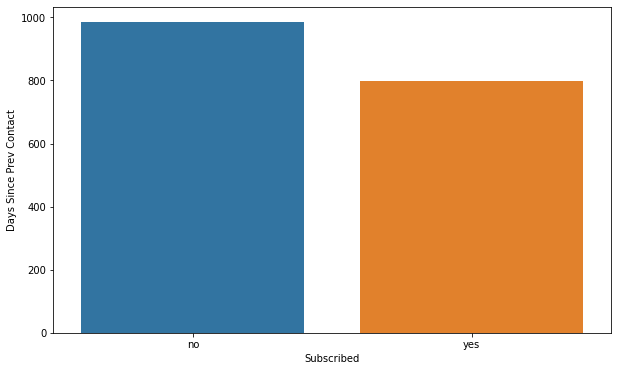

In [30]:
#target Variable  =  Subscribed
plt.figure(figsize = (10,6))
sns.barplot(data=df,x = df['Subscribed'],y = df['Days Since Prev Contact'],ci=None,orient='v')

<Axes: xlabel='Subscribed', ylabel='Prev Campaign Contacts'>

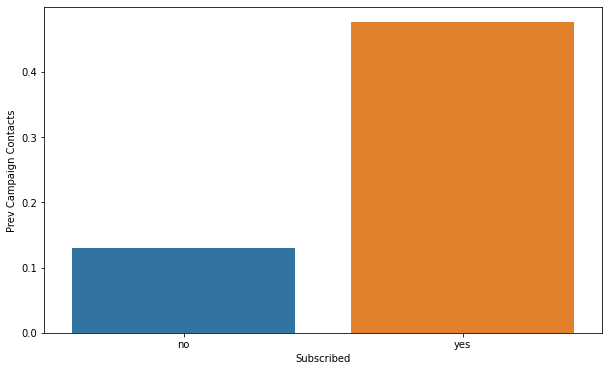

In [31]:
plt.figure(figsize = (10,6))
sns.barplot(data=df,x = df['Subscribed'],y = df['Prev Campaign Contacts'],ci=None,orient='v')

<Figure size 720x432 with 0 Axes>

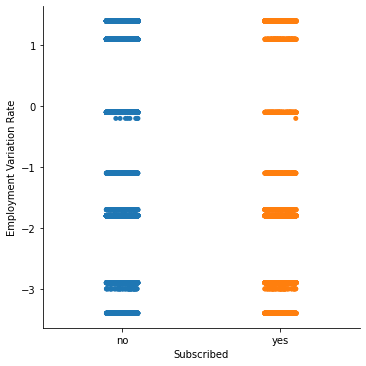

In [32]:
plt.figure(figsize = (10,6))
sns.catplot(data = df, x= 'Subscribed', y = 'Employment Variation Rate')

<Axes: >

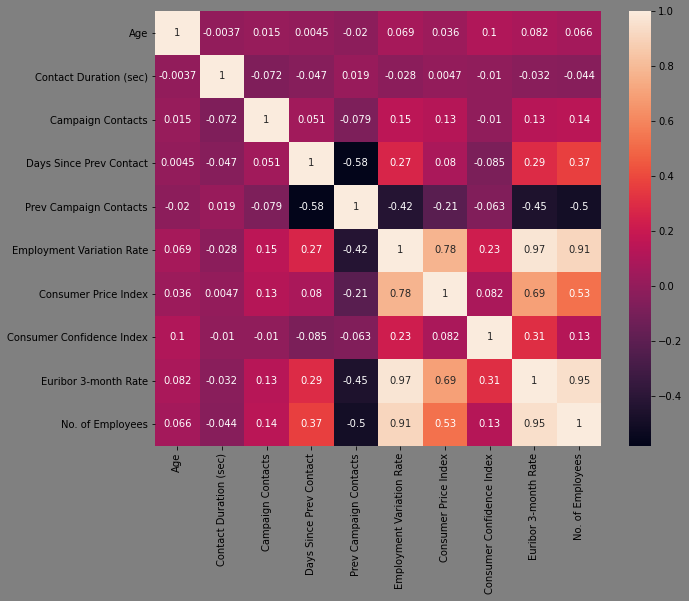

In [33]:
plt.figure(figsize=(10,8),facecolor='grey')
sns.heatmap(df.corr(),annot=True)

In [34]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA


In [35]:
X = df.iloc[:,0:20]
y = df.iloc[:,20:]
y.shape

(40708, 1)

In [36]:
X

,Age,Job,Marital Status,Education,Has Default,Housing Loan,Personal Loan,Contact Type,Last Contact Month,Last Contact Day,Contact Duration (sec),Campaign Contacts,Days Since Prev Contact,Prev Campaign Contacts,Prev Campaign Outcome,Employment Variation Rate,Consumer Price Index,Consumer Confidence Index,Euribor 3-month Rate,No. of Employees
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,149.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41181,37.0,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281.0,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41182,29.0,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112.0,1.0,9.0,1.0,success,-1.1,94.767,-50.8,1.028,4963.6
41184,46.0,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383.0,1.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6
41185,56.0,retired,married,university.degree,no,yes,no,cellular,nov,fri,189.0,2.0,999.0,0.0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
OH = OneHotEncoder(sparse=False,drop='first')


In [39]:
X_train.shape

(32566, 20)

In [40]:
X_test.shape

(8142, 20)

In [41]:
categorical_columns = [col for col in X_train.columns if X_train[col].dtype == 'object']
print("Categorical Columns:", categorical_columns)

Categorical Columns: ['Job', 'Marital Status', 'Education', 'Has Default', 'Housing Loan', 'Personal Loan', 'Contact Type', 'Last Contact Month', 'Last Contact Day', 'Prev Campaign Outcome']


# ColumnTransformers

In [45]:
from sklearn.compose import ColumnTransformer
Tranformer = ColumnTransformer(transformers=[('Tfn1',OneHotEncoder(sparse=True,drop='first')
,['Job', 'Marital Status', 'Education', 'Has Default', 'Housing Loan', 'Personal Loan', 'Contact Type', 'Last Contact Month', 'Last Contact Day', 'Prev Campaign Outcome'])]
,remainder='passthrough')

In [46]:
X_train_transformer = Tranformer.fit_transform(X_train)
X_test_transformer = Tranformer.transform(X_test)

In [47]:
X_test_transformer.shape

(8142, 53)

In [48]:
X_train.shape

(32566, 20)

In [49]:
y_train = OH.fit_transform(y_train)
y_test = OH.fit_transform(y_test)

In [50]:
y_test.shape

(8142, 1)

# logistic_regression

In [51]:
LOG = LogisticRegression()

In [52]:
LOG.fit(X_train_transformer,y_train)

LogisticRegression()

In [53]:
X_test_transformer.shape

(8142, 53)

In [57]:
y_pred = LOG.predict(X_test_transformer)

In [59]:
accuracy_score(y_test,y_pred)

0.9103414394497666